<a href="https://colab.research.google.com/github/kwonkw/Eye-contact/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%A7%8C%EB%93%A4%EA%B8%B0_%2B_annotaion_%2B_yaml%ED%8C%8C%EC%9D%BC_%EC%83%9D%EC%84%B1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

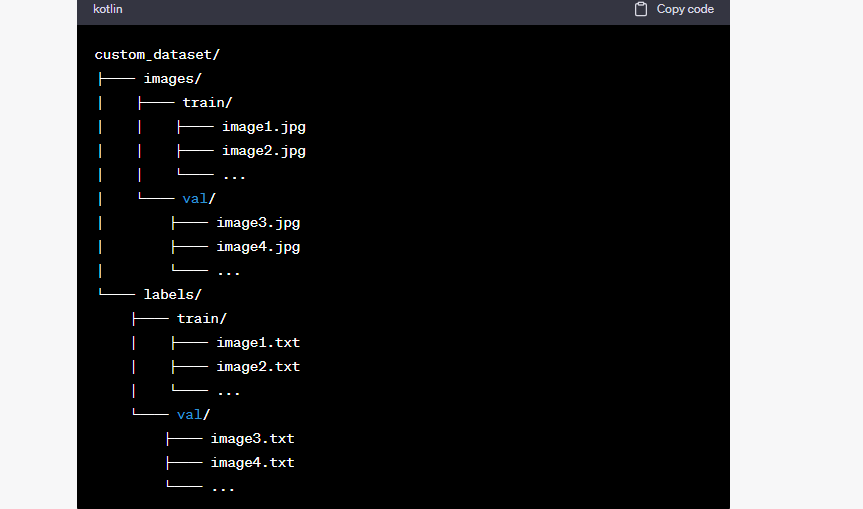

기본 설정

In [ ]:
import xml.etree.ElementTree as ET
import os
import shutil
import glob

data annotation

In [ ]:
label_list = {'bollard': 0, 'pole': 1, 'tree_trunk': 2}
path = 'C:/Users/Master/yolov5/data/tmpdataset/labels/'

entries = os.listdir('C:/Users/Master/yolov5/data/tmpdataset/images/인도보행 영상/바운딩박스/')
for entry in entries:
    if '.' not in entry:
        se_entries = os.listdir('C:/Users/Master/yolov5/data/tmpdataset/images/인도보행 영상/바운딩박스/' + entry)
        for se in se_entries:
            if '.xml' in se:
                tree = ET.parse('C:/Users/Master/yolov5/data/tmpdataset/images/인도보행 영상/바운딩박스/' + entry + '/' + se)
                root = tree.getroot()
                count = 0
                for annotations in root:
                    if annotations.attrib.get('name') is None:
                        pass
                    else:
                        name = str(annotations.attrib.get('name')).split('.')[0]
                        height = int(annotations.attrib.get('height'))
                        width = int(annotations.attrib.get('width'))
                        filename = path + name
                        count = 0
                        with open(filename + '.txt', 'w') as f:
                            for image in annotations:
                                label = image.attrib.get('label')
                                if label in label_list:
                                    count += 1
                                    x1 = float(image.attrib.get('xtl'))
                                    y1 = float(image.attrib.get('ytl'))
                                    x2 = float(image.attrib.get('xbr'))
                                    y2 = float(image.attrib.get('ybr'))
                                    xcenter = abs((x1 + x2) / 2 / width)
                                    ycenter = abs((y1 + y2) / 2 / height)
                                    Height = abs((x2 - x1) / height)
                                    Width = abs((y1 - y2) / width)

                                    f.write('{} {} {} {} {} \n'.format(label_list[image.attrib.get('label')],
                                                                    xcenter,
                                                                    ycenter,
                                                                    Height,
                                                                    Width ))
                            f.close()
                        if count ==0:
                            os.remove(filename + '.txt')


In [ ]:
path = 'C:/Users/Master/yolov5/data/tmpdataset/image/'

entries = os.listdir('C:/Users/Master/yolov5/data/tmpdataset/images/인도보행 영상/바운딩박스/')
count=0
for entry in entries:
    if '.' not in entry :
        now_entries = os.listdir('C:/Users/Master/yolov5/data/tmpdataset/images/인도보행 영상/바운딩박스/'+entry)
        for now in now_entries:
            if '.jpg' in now or '.png' in now :
                source = f'C:/Users/Master/yolov5/data/tmpdataset/images/인도보행 영상/바운딩박스/{entry}/{now}'
                destination = path + now
                shutil.move(source, destination)
                count+=1
                print(f'Done{count}')


In [ ]:
#train,val set 만들기
images = glob.glob('C:/Users/Master/yolov5/data/tmpdataset/image/*')
len(images)

64855

In [ ]:
labels = glob.glob('C:/Users/Master/yolov5/data/tmpdataset/labels/*')
len(labels)

25805

In [ ]:
images[0].split('/')[-1].split("\\")[-1].split('.')[0]

'MP_KSC_002401'

In [ ]:
# images, labels 개수 맞추기
images = glob.glob('C:/Users/Master/yolov5/data/tmpdataset/image/*')
len(images)
labels = glob.glob('C:/Users/Master/yolov5/data/tmpdataset/labels/*')
len(labels)

for i in range(len(labels)):
  labels[i]=labels[i].split('/')[-1].split("\\")[-1].split('.')[0]

for j in range(len(images)):
  if images[j].split('/')[-1].split("\\")[-1].split('.')[0] in labels:
    shutil.move(images[j], 'C:/Users/Master/yolov5/data/tmpdataset/fullimage/'+ images[j].split('/')[-1].split("\\")[-1])


train, validation dataset 나누기

In [ ]:
full = glob.glob('C:/Users/Master/yolov5/data/tmpdataset/fullimage/*')
len(full)

29522

In [ ]:
labels = glob.glob('C:/Users/Master/yolov5/data/tmpdataset/labels/*')
len(labels)

29522

In [ ]:
num=int(len(labels)*0.2)
num

5904

In [ ]:
# validation
import random
random.seed(2023)


for f in random.sample(full,num):
  shutil.move(f,'C:/Users/Master/yolov5/data/dataset/images/val')
for f in random.sample(labels,num):
 shutil.move(f,'C:/Users/Master/yolov5/data/dataset/labels/val')


In [ ]:
images = glob.glob('C:/Users/Master/yolov5/data/tmpdataset/fullimage/*')
labels = glob.glob('C:/Users/Master/yolov5/data/tmpdataset/labels/*')

In [ ]:
#train
for f in images:
    shutil.move(f,'C:/Users/Master/yolov5/data/dataset/images/train')
for f in labels:
    shutil.move(f,'C:/Users/Master/yolov5/data/dataset/labels/train')


yaml 파일 생성

In [ ]:
with open('C:/Users/Master/yolov5/data/dataset/eye_contact.yaml', 'w') as f:
    yaml_content = """\
path: C:/Users/Master/yolov5/data/dataset/  # dataset root dir
train: images/train
val: images/train

# Classes
nc: 3  # number of classes
names: ['bollard', 'pole', 'tree_trunk']  # class names
"""
    f.write(yaml_content)
